# 下準備


## TensorFlorのバージョン

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


## Fashion MNISTデータの取得

In [0]:
import keras

Using TensorFlow backend.


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_data, train_teacher_labels), (test_data, test_teacher_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
fashion_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データセットを見る

In [0]:
train_data.shape

(60000, 28, 28)

In [0]:
len(train_teacher_labels)

60000

## 検証データの確認

In [0]:
test_data.shape

(10000, 28, 28)

In [0]:
len(test_teacher_labels)

10000

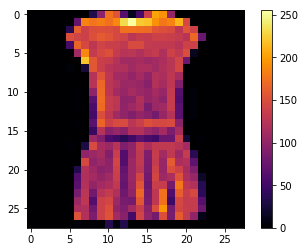

In [0]:
plt.figure()
plt.imshow(train_data[3], cmap='inferno')
plt.colorbar()
plt.grid(False)

## データセットの一部を描画する

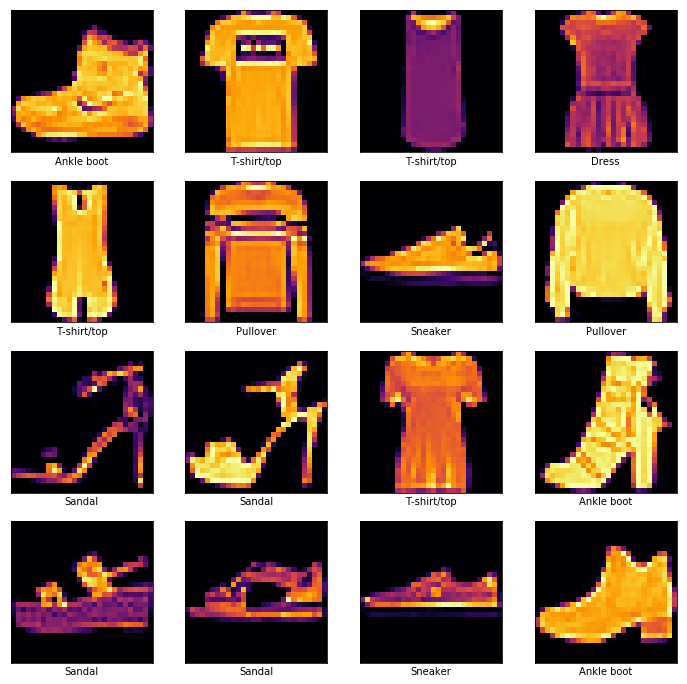

In [0]:
plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap='inferno')
    plt.xlabel(fashion_names[train_teacher_labels[i]])

# 調理手順

## 設定

In [0]:
BATCH_SIZE = 128
NUM_CLASSES = 10
EPOCHS = 20

IMG_ROWS, IMG_COLS = 28, 28

## 学習モデルに合わせてデータ調整

In [0]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [0]:
train_data /= 255
test_data /= 255

In [0]:
print('学習データ　train_data shape:', train_data.shape)
print(train_data.shape[0], 'サンプルを学習します')
print('検証データ　test_data shape:', train_data.shape)
print(test_data.shape[0], 'サンプルを検証します')

学習データ　train_data shape: (60000, 28, 28)
60000 サンプルを学習します
検証データ　test_data shape: (60000, 28, 28)
10000 サンプルを検証します


## 学習モデルの構築

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [0]:
model = Sequential()

In [0]:
# 入力層
model.add(Flatten(input_shape=(IMG_ROWS, IMG_COLS)))
# 中間層
model.add(Dense(128, activation=tf.nn.relu))
# 出力層
model.add(Dense(10, activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## モデルのコンパイル


In [0]:
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
def plot_loss_accuracy_graph(fit_record):
  # 青い線で誤差の履歴をプロットします、検証時誤差は黒い線で
  plt.plot(fit_record.history['loss'], "-D", color="blue", label="train_loss", linewidth=2)
  plt.plot(fit_record.history['val_loss'], "-D", color="black", label="val_loss", linewidth=2)
  plt.title('LOSS')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')
  plt.show()
  
  # 緑の線で精度の履歴をプロットします、検証時制度は黒い線で
  plt.plot(fit_record.history['acc'],"-o", color="green", label="train_accuracy", linewidth=2)
  plt.plot(fit_record.history['val_acc'],"-o",color="black", label="val_accuracy", linewidth=2)
  plt.title('ACCURACY')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc="lower right")
  plt.show()

## 学習

In [0]:
print('反復学習回数：', EPOCHS)
fit_record = model.fit(train_data, train_teacher_labels,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(test_data, test_teacher_labels))

反復学習回数： 20
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.5488 - acc: 0.8120 - val_loss: 0.4561 - val_acc: 0.8384
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.4055 - acc: 0.8580 - val_loss: 0.4100 - val_acc: 0.8568
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3617 - acc: 0.8718 - val_loss: 0.3834 - val_acc: 0.8652
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.3372 - acc: 0.8795 - val_loss: 0.3795 - val_acc: 0.8666
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3220 - acc: 0.8831 - val_loss: 0.3790 - val_acc: 0.8628
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3042 - acc: 0.8903 - val_loss: 0.3552 - val_acc: 0.8735
Epoch 7/20
60000/60000 [==============================] - 2s 27us/ste

## 学習プロセスのグラフ

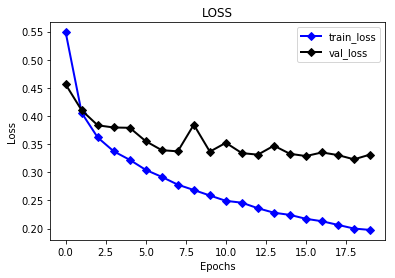

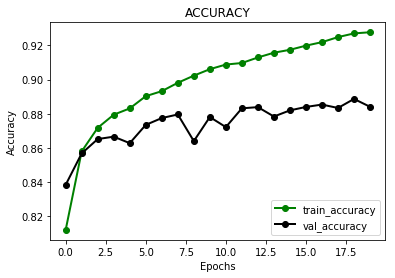

In [0]:
plot_loss_accuracy_graph(fit_record)

## 検証

In [0]:
result_score = model.evaluate(test_data, test_teacher_labels)

print('検証誤差:', result_score[0])
print('検証正確率:', result_score[1])

10000/10000 [==============================] - 0s 39us/step
検証誤差: 0.33139895792007446
検証正確率: 0.8841


## 予測

In [0]:
# 検証データから画像を表示します
data_location=4
img = test_data[data_location]
print(img.shape)

(28, 28)


In [0]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [0]:
predictions_result_array = model.predict(img)
print(predictions_result_array)

[[2.4387923e-01 2.3574904e-08 1.8611666e-02 1.2909652e-03 5.1393820e-04
  7.4329350e-08 7.3568809e-01 1.0252295e-11 1.5983398e-05 1.7549807e-09]]


In [0]:
number=np.argmax(predictions_result_array[0])
print('予測結果：',fashion_names[number])

予測結果： Shirt


## 学習済モデルの保存

In [0]:
model.save('keras-fashion-mnist-model.h5')